In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.preprocessing as sklp
import sklearn.model_selection as skms
import sklearn.tree as sktree
import sklearn.neighbors as sknn
import sklearn.metrics as skm
import sklearn.dummy as skd
import sklearn as sk
import matplotlib.pyplot as plt

In [13]:
weatherdata = pd.read_csv('weatherdata.csv', sep=',')
weatherdata.columns = ['desc', 'temperature', 'pressure', 'humidity', 'wind_str', 'wind_deg', 'beachday?']
weatherdata.head()

,desc,temperature,pressure,humidity,wind_str,wind_deg,beachday?
0,few clouds,20.49,1017,83,2.06,290,False
1,sunny,24.00,1000,35,1.00,80,True
2,windy,19.23,1017,83,4.00,190,False
3,sunny,22.00,1000,65,1.00,75,True


In [14]:
weatherdata = weatherdata.dropna()

In [15]:
weatherEncoded = weatherdata.copy()

encoder = sklp.LabelEncoder()

weatherEncoded['desc'] = (encoder.fit_transform(weatherEncoded['desc']))

weatherEncoded['beachday?'] = weatherEncoded['beachday?'].astype(int)
weatherEncoded.head()

,desc,temperature,pressure,humidity,wind_str,wind_deg,beachday?
0,0,20.49,1017,83,2.06,290,0
1,1,24.00,1000,35,1.00,80,1
2,2,19.23,1017,83,4.00,190,0
3,1,22.00,1000,65,1.00,75,1


<AxesSubplot:>

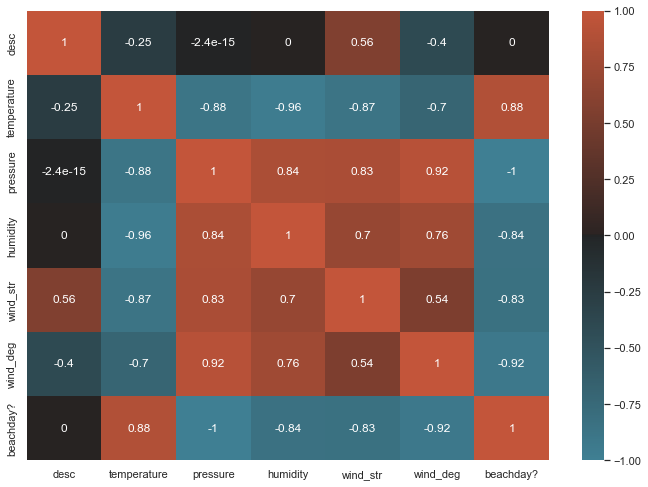

In [31]:
corrmap = sns.diverging_palette(220,20, center="dark",as_cmap=True)
corrmat = weatherEncoded.corr()

sns.set(rc={'figure.figsize':(11.7,8.27)})

sbplt = plt.subplots()
sns.heatmap(
    corrmat,
    cmap = corrmap,
    annot= True
    )

In [17]:
X = weatherEncoded[['desc', 'temperature', 'pressure', 'humidity', 'wind_str', 'wind_deg']]
Y = weatherEncoded[['beachday?']]
SEED = 134
X_train, X_test, Y_train, Y_test = skms.train_test_split(X, Y, test_size=0.3, random_state= SEED, stratify= Y)

In [18]:
treeLeaves = np.arange(2,40)
tree_leaves_train_accuracy =np.empty(len(treeLeaves))
tree_leaves_test_accuracy = np.empty(len(treeLeaves))

for i,k in enumerate(treeLeaves):
        DecisionModel = sktree.DecisionTreeClassifier(criterion = "gini", max_leaf_nodes= k, random_state= 0, max_depth= 5)
        DecisionModel.fit(X_train, Y_train)
        tree_leaves_train_accuracy[i] = DecisionModel.score(X_train, Y_train)
        tree_leaves_test_accuracy[i] = DecisionModel.score(X_test, Y_test)

In [19]:
treeHighestAccurracy = max(tree_leaves_test_accuracy)
print("Highest Accuracy in Testing: ", (treeHighestAccurracy * 100), "%")
treeHighestAccurracyIndex = (np.argmax(tree_leaves_test_accuracy, axis= 0))
print("Highest Accuracy Number of Leaves: ", treeLeaves[treeHighestAccurracyIndex])

Highest Accuracy in Testing:  100.0 %
Highest Accuracy Number of Leaves:  2


In [24]:
DecisionModel = sktree.DecisionTreeClassifier(criterion = "gini", max_leaf_nodes= treeLeaves[treeHighestAccurracyIndex], random_state= 0, max_depth= 5)
DecisionModel.fit(X_train, Y_train)
trainPrediction = DecisionModel.predict(X_train)
treeTrainPrediction = Y_train.copy()
treeTrainPrediction["Prediction"] = trainPrediction
treeTrainPrediction["Result"] = (treeTrainPrediction['beachday?'] == treeTrainPrediction['Prediction']).astype(int)

In [25]:
treeTrainAccurracy = treeTrainPrediction['Result'].sum() / len(treeTrainPrediction)
print("Train Accurracy:",treeTrainAccurracy * 100, "%")

Train Accurracy: 100.0 %


Text(81.8, 0.5, 'Day')

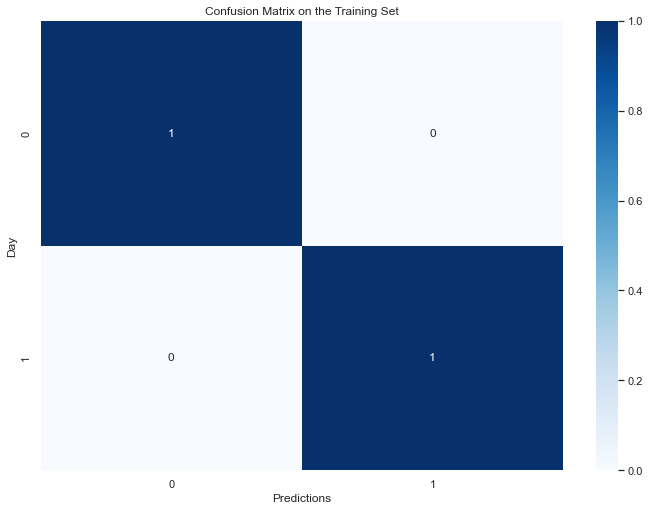

In [27]:
cm = sk.metrics.confusion_matrix(treeTrainPrediction['beachday?'],treeTrainPrediction['Prediction'])
tcm = sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")
tcm.set_title("Confusion Matrix on the Training Set")
tcm.set_xlabel("Predictions")
tcm.set_ylabel("Beach Day?")

In [28]:
testPrediction = DecisionModel.predict(X_test)
treeTestPrediction = Y_test.copy()
treeTestPrediction['Prediction'] = testPrediction
treeTestPrediction['Result'] = (treeTestPrediction['beachday?'] == treeTestPrediction['Prediction']).astype(int)

In [29]:
treeTestAccurracy = treeTestPrediction['Result'].sum() / len(treeTestPrediction)
print("Test Accurracy:",treeTestAccurracy * 100, "%")   

Test Accurracy: 100.0 %


Text(81.8, 0.5, 'User Ratings')

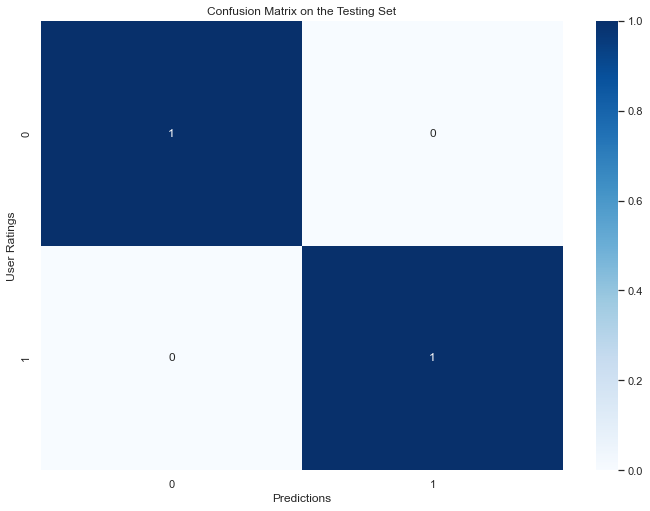

In [30]:
cm = sk.metrics.confusion_matrix(treeTestPrediction['beachday?'],treeTestPrediction['Prediction'])
tcm = sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")
tcm.set_title("Confusion Matrix on the Testing Set")
tcm.set_xlabel("Predictions")
tcm.set_ylabel("Beach Day?")